#### Dataset 3

This is a car insurance dataset, you can download from [this link](https://www.dropbox.com/s/co0q45rg78cq9oo/insurance_data.csv?dl=0). We try to train models to predict user's car insurance charges given the 6 features from the user's profile. As shown below, each row contains one user's 6 features and car insurance charges. ft1, ft2 and ft3 are numerical features, ft4 and ft5 and ft6 are categorial features.
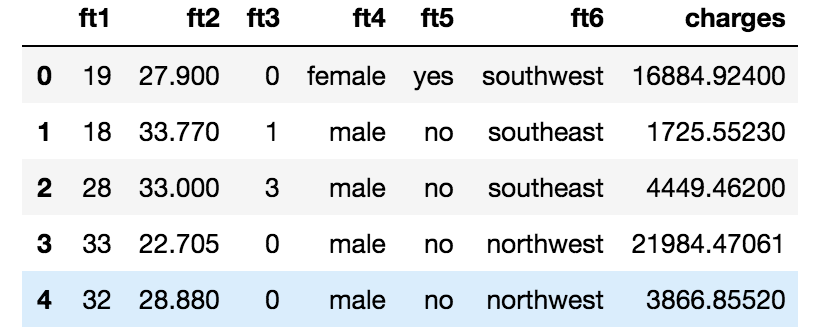

##### Feature Preprocessing
(a) Feature Encoding: Use one-hot-encoding for the following 3 categorical features: ft4, ft5, ft6. Use the encoded features and the numerical features to fit a linear regression model.

In [494]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.feature_selection import f_regression, mutual_info_regression

import matplotlib.pyplot as plt

In [192]:
data = pd.read_csv('insurance_data.csv')

In [172]:
ct = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out1 = ct.fit_transform(data)

In [174]:
X1 = out1[:, :-1]
y1 = out1[:, -1:]

In [179]:
def perform_cv10_regression(X, y):
    scores = cross_validate(LinearRegression(), X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
    avg_test_rmse = np.sqrt(-np.mean(scores['test_score']))
    avg_train_rmse = np.sqrt(-np.mean(scores['train_score']))
    return avg_test_rmse, avg_train_rmse

In [180]:
avg_test_rmse1, avg_train_rmse1 = perform_cv10_regression(X1, y1)

In [276]:
def perform_cv10_regression_predict_plot(X, y):
    predicted = cross_val_predict(reg, X, y, cv=10)

    plt.figure(figsize=(8, 5))
    plt.scatter(y, predicted, c='orange')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True')
    plt.ylabel('Fitted')
    plt.title("Fitted values vs True values")
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.scatter(predicted, predicted - y, marker='x')
    plt.plot([0, y.max()], [0, 0], 'k--', lw=2)
    plt.xlabel('Fitted')
    plt.ylabel('Residual')
    plt.title("Residual values vs Fitted values")
    plt.show()

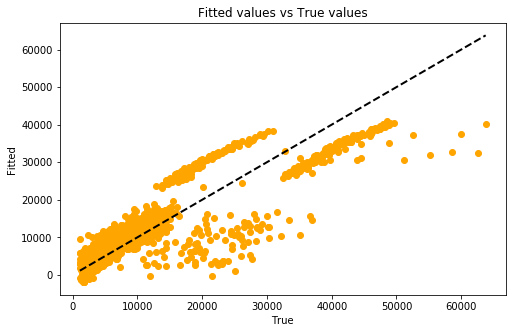

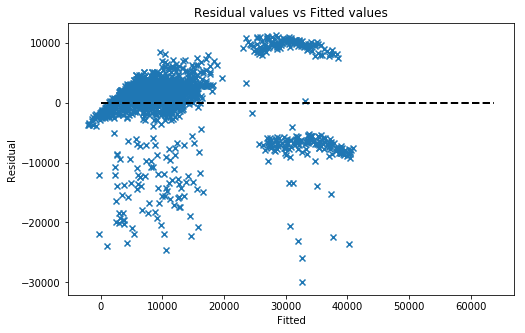

In [277]:
perform_cv10_regression_predict_plot(X1, y1)

In [181]:
ct = ColumnTransformer([("scaler", StandardScaler(), ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out2 = ct.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [137]:
column_names = [name[name.rfind("_")+1:] for name in get_column_names_from_ColumnTransformer(ct)]
out_data = pd.DataFrame(out, columns=column_names)

In [244]:
X2 = out2[:, :-1]
y2 = out2[:, -1:]

In [245]:
avg_test_rmse2, avg_train_rmse2 = perform_cv10_regression(X2, y2)

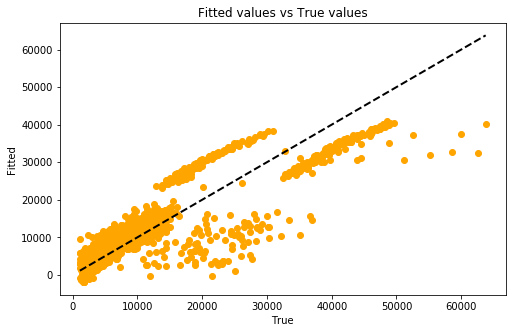

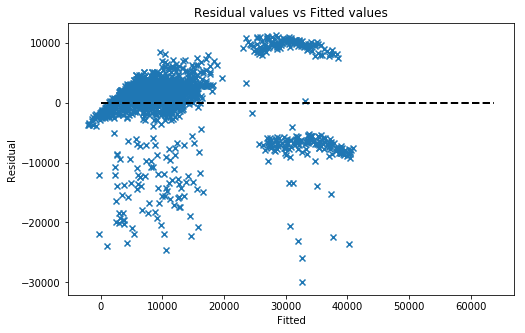

In [278]:
perform_cv10_regression_predict_plot(X2, y2)

In [222]:
from sklearn.base import BaseEstimator, ClassifierMixin

#custom transformer for column 1 ('ft1') that buckets the values into ranges
class Ft1Transformer(BaseEstimator, ClassifierMixin):  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *_):
        for index, rowdata in X.iterrows():
            if rowdata[0] < 30:
                rowdata[0] = 1
            elif rowdata[0] >= 30 and rowdata[0] <= 50:
                rowdata[0] = 2
            else:
                rowdata[0] = 3
        return X

In [223]:
ct3 = ColumnTransformer([("ft1", Ft1Transformer(), ['ft1']), ("scaler", StandardScaler(), ['ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out3 = ct3.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [227]:
X3 = out3[:, :-1]
y3 = out3[:, -1:]

In [229]:
avg_test_rmse3, avg_train_rmse3 = perform_cv10_regression(X3, y3)
avg_test_rmse3, avg_train_rmse3

(6239.966011198331, 6198.08020387168)

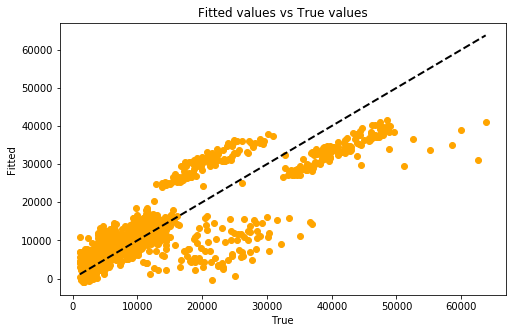

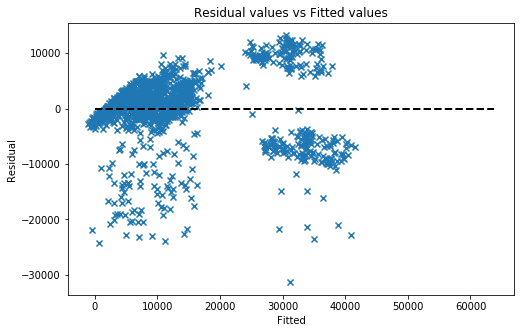

In [279]:
perform_cv10_regression_predict_plot(X3, y3)

In [311]:
from sklearn.base import BaseEstimator, ClassifierMixin

#custom transformer for column 4, 5 ('ft4', 'ft5') that converts binary categories into numeric values (-1, +1)
class Ft45Transformer(BaseEstimator, ClassifierMixin):  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *_):
        for index, rowdata in X.iterrows():
            for i in range(len(rowdata)):
                if rowdata[i] == 'no' or rowdata[i] == 'male':
                    rowdata[i] = -1.0
                else:
                    rowdata[i] = 1.0
        return X

In [312]:
from sklearn.base import BaseEstimator, ClassifierMixin

#custom transformer for column 6 ('ft6') that converts categories into numeric values 
class Ft6Transformer(BaseEstimator, ClassifierMixin):  
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, *_):
        for index, rowdata in X.iterrows():
            if rowdata[0] == 'southwest':
                rowdata[0] = 1.0
            elif rowdata[0] == 'southeast':
                rowdata[0] = 2.0
            else:
                rowdata[0] = 3.0
        return X

In [313]:
ct4 = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("ft45", Ft45Transformer(), ['ft4', 'ft5']), ("ft6", Ft6Transformer(), ['ft6'])], remainder='passthrough')
out4 = ct4.fit_transform(data)

In [528]:
out4 = out4.astype(float)

In [322]:
X4 = out4[:, :-1]
y4 = out4[:, -1:]

In [516]:
f, p = f_regression(X4, np.ravel(y4))
m = mutual_info_regression(X4, np.ravel(y4))

In [517]:
#return max and 2nd max of array

def top2(a):
    f1 = np.argmax(a)
    
    #mask the max value and run argmax to get the 2nd-max
    maskeda = np.ma.array(a)
    maskeda[f1] = np.ma.masked
    f2 = np.argmax(maskeda)
    
    return f1, f2

In [518]:
if1, if2 = top2(f)
im1, im2 = top2(m)

In [519]:
print(if1, if2)
print(im1, im2)

print("Most important features by f-score: ")
print(data.columns[if1], data.columns[if2])

print("Most important features by mutual-info-score: ")
print(data.columns[im1], data.columns[im2])

4 0
5 3
0 4
Most important features by f-score: 
ft5 ft1
Most important features by mutual-info-score: 
ft1 ft5


In [357]:
def scatter_plot(x, y, color, xl, yl, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, c=color)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)
    plt.show()

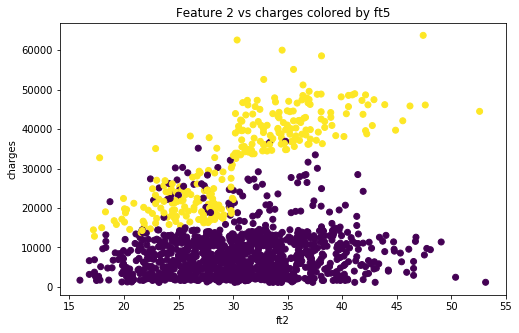

In [361]:
scatter_plot(X4[:,1], y4, X4[:,4], 'ft2', 'charges', "Feature 2 vs charges colored by ft5")

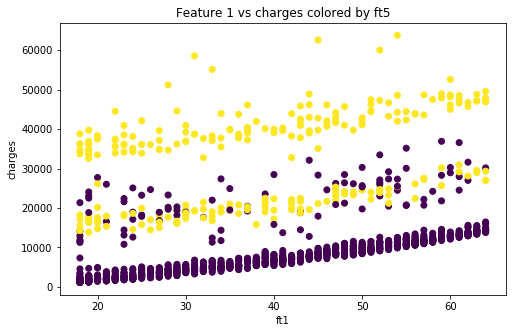

In [366]:
scatter_plot(X4[:,0], y4, X4[:,4], 'ft1', 'charges', "Feature 1 vs charges colored by ft5")

In [489]:
ct5 = ColumnTransformer([("passthrough", 'passthrough', ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out5 = ct5.fit_transform(data)

In [490]:
X5 = out5[:, :-1]
y5 = out5[:, -1:]

In [502]:
def logy(y):
    return np.log(y.astype(float))

In [503]:
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score, make_scorer

def rmse_exp(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true.astype(float) - np.exp(y_pred.astype(float)))))

def manual_k_fold_reg_log(X, y):
    kf = KFold(n_splits=10, shuffle=True)

    cv_train_rmse, cv_test_rmse = [], []
    
    reg = LinearRegression()

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train_ = logy(y_train)
        y_test_ = logy(y_test)
        reg.fit(X_train, y_train_)
        train_rmse = rmse_exp(y_train, reg.predict(X_train))
        test_rmse = rmse_exp(y_test, reg.predict(X_test))
        
        cv_train_rmse.append(train_rmse)
        cv_test_rmse.append(test_rmse)
        
    return np.mean(cv_train_rmse), np.mean(cv_test_rmse)

In [504]:
train_rmse, test_rmse = manual_k_fold_reg_log(X5.astype(float), y5)
train_rmse, test_rmse

(8359.753779429911, 8394.766829184795)

In [505]:
#use standard scaler on first 3 columns
ct6 = ColumnTransformer([("scaler", StandardScaler(), ['ft1', 'ft2', 'ft3']), ("one_hot", OneHotEncoder(handle_unknown='ignore', dtype=np.bool_), ['ft4', 'ft5', 'ft6'])], remainder='passthrough')
out6 = ct6.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [506]:
X6 = out6[:, :-1]
y6 = out6[:, -1:]

In [507]:
train_rmse, test_rmse = manual_k_fold_reg_log(X6.astype(float), y6)
train_rmse, test_rmse

(8361.742637044645, 8402.398461992121)

In [526]:
f5, p5 = f_regression(X5, np.ravel(logy(y5)))
m5 = mutual_info_regression(X5, np.ravel(logy(y5)))

In [527]:
if1_5, if2_5 = top2(f5)
im1_5, im2_5 = top2(m5)

print(if1_5, if2_5)
print(im1_5, im2_5)

6 5
0 5


In [524]:
f6, p6 = f_regression(X6, np.ravel(logy(y6)))
m6 = mutual_info_regression(X6, np.ravel(logy(y6)))

In [525]:
if1_6, if2_6 = top2(f6)
im1_6, im2_6 = top2(m6)

print(if1_6, if2_6)
print(im1_6, im2_6)

6 5
0 5


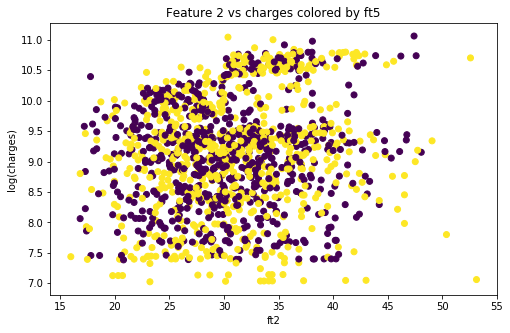

In [512]:
scatter_plot(X5[:,1], logy(y5), X5[:,4], 'ft2', 'log(charges)', "Feature 2 vs charges colored by ft5")

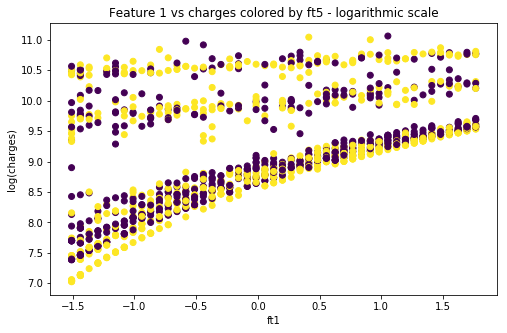

In [513]:
scatter_plot(X6[:,0], logy(y6), X6[:,4], 'ft1', 'log(charges)', "Feature 1 vs charges colored by ft5 - logarithmic scale")